In [240]:
import warnings; warnings.simplefilter('ignore')

In [241]:
import numpy as np
from skimage import data, io, exposure, img_as_float
from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import os

In [242]:
filename = "/Users/armanrahman/Downloads/gear_images/tents/894457.jpeg"
original_image = io.imread(filename)

original_image.min(), original_image.max(), original_image.mean()

(0, 255, 212.37875035991937)

In [243]:
def pad_and_resize(image, desired_size):
    rows, columns, channels = image.shape
    delta_y = abs(rows - max(columns, rows))
    delta_x = abs(columns - max(columns, rows))
    top, bottom = delta_y//2, delta_y - (delta_y//2)
    left, right = delta_x//2, delta_x - (delta_x//2)
    image = np.pad(image, ((top,bottom),(left,right),(0,0)), 'constant', constant_values=(255))
    if image.shape[0] < desired_size:
        delta_min = desired_size - max(rows, columns)
        image = np.pad(image, ((delta_min//2, -(-delta_min//2)), (delta_min//2, -(-delta_min//2)), (0,0)), 'constant', constant_values=(255))
    elif image.shape[0] > desired_size:
        image = resize(image, (desired_size, desired_size))
    return image
        

In [244]:
def equalize_image(image):
    image = exposure.rescale_intensity(image, in_range=(0, 255))
    return exposure.equalize_adapthist(image)


Transformations:


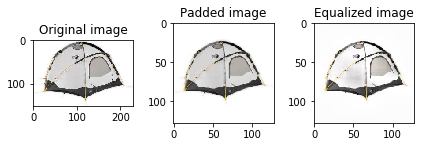

In [245]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ax = axes.ravel()

padded_image = pad_and_resize(original_image, 128)
equalized_image = equalize_image(padded_image)

ax[0].imshow(original_image)
ax[0].set_title("Original image")

ax[1].imshow(padded_image)
ax[1].set_title("Padded image")

ax[2].imshow(equalized_image)
ax[2].set_title("Equalized image")

print("Transformations:")
plt.tight_layout()
plt.show()

In [246]:
def plot_img_and_hist(image, axes):
    image = img_as_float(image)
    ax_img, ax_hist = axes

    # Display image
    ax_img.imshow(image)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=255, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    return ax_img, ax_hist

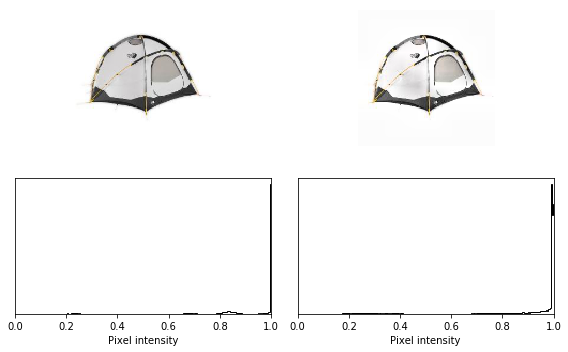

In [247]:
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
axes[0, 1] = fig.add_subplot(2, 2, 2)
axes[1, 0] = fig.add_subplot(2, 2, 3)
axes[1, 1] = fig.add_subplot(2, 2, 4)

ax_img, ax_hist = plot_img_and_hist(padded_image, axes[:, 0])
ax_img, ax_hist = plot_img_and_hist(equalized_image, axes[:, 1])

plt.tight_layout()
plt.show()